## 202. Happy Number

https://leetcode.cn/problems/happy-number/

The difficulty is how to determine the stopping criteria. The answer is that if this doesn't converge to 1, then there is a loop. So we just need a set to store the values.

In [1]:
class Solution:
    def isHappy(self, n: int) -> bool:
        def transform(x):
            s = str(x)
            length = len(s)
            _sum = 0
            for i in range(length):
                _sum += int(s[i])**2
            return _sum

        seen = set()
        while n != 1:
            n = transform(n)
            if n in seen:
                return False
            else:
                seen.add(n)

        return True

## 1706. Where Will the Ball Fall

This is a simulation problem. The problem setup is interesting. No easy way to solve, only the stopping criteria needs some thought.

In [8]:
class Solution:
    def findBall(self, grid: list[list[int]]) -> list[int]:
        m = len(grid)
        n = len(grid[0])
        res = [-1] * n
        for j in range(n):
            col = j
            # simulate the jth ball
            for i in range(m):
                # current direction +1 right, -1 left
                direction = grid[i][col]
                col += direction
                # if the ball reaches the wall? or there is a "V". Within the same row "i", look right or look to the left, and see if the directions differ
                if col < 0 or col == n or direction != grid[i][col]:
                    col = -1
                    break
            res[j] = col
        return res

## 102. Binary Tree Level Order Traversal

Very good solution:
https://leetcode.cn/problems/binary-tree-level-order-traversal/solution/bfs-de-shi-yong-chang-jing-zong-jie-ceng-xu-bian-l/

In [3]:
# Definition for a binary tree node.
# class TreeNode:
#     def __init__(self, val=0, left=None, right=None):
#         self.val = val
#         self.left = left
#         self.right = right
class Solution:
    def levelOrder(self, root) -> list[list[int]]:
        res = list()
        from collections import deque
        d = deque()
        if root is not None:
            d.append(root)
        while len(d) != 0:
            level = list()
            n = len(d)
            # process all the values in the last layer
            for i in range(n):
                cur_node = d.popleft()
                level.append(cur_node.val)
                if cur_node.left is not None:
                    d.append(cur_node.left)
                if cur_node.right is not None:
                    d.append(cur_node.right)
            res.append(level)
        return res

In [22]:
class Solution:
    def combinationSum2(self, candidates, target):
        res = list()
        n = len(candidates)
        def backtrack(idx, comb):
            # meet the target
            if sum(comb) == target:
                res.append(comb)
                return

            # all the numbers have been considered
            if idx == n or sum(comb) > target:
                return
            
            for i in range(idx, n):
                if i > idx and candidates[i] == candidates[i-1]:
                    continue
                backtrack(i + 1, comb + [candidates[i]])

        candidates.sort()
        backtrack(0, [])
        return res

In [23]:
Solution().combinationSum2([10,1,2,7,6,1,5], 8)

[[1, 1, 6], [1, 2, 5], [1, 7], [2, 6]]

## Option Simulation

In [37]:
#Import Libraries
import opstrat as op
#Declare parameters
K=100    #spot price
St=208   #current stock price
r=4      #4% risk free rate
t=30     #time to expiry, 30 days 
v=20     #volatility 
type='c' #Option type call
#Black Scholes Model
bsm=op.black_scholes(K=K, St=St, r=r, t=t, 
                     v=v, type='c')

In [38]:
bsm

{'value': {'option value': 108.32822727595646,
  'intrinsic value': 108,
  'time value': 0.32822727595646484},
 'greeks': {'delta': 1.0,
  'gamma': 4.163942032170844e-38,
  'theta': -0.010922933997155456,
  'vega': 2.9613499410384555e-37,
  'rho': 0.08192200497866592}}

In [92]:
import numpy as np
K = 100
_St = np.linspace(80, 120, 20)
r = 4
_t = [30, 90, 180, 360]
v = 20

In [93]:
data = []
for St in _St:
    for t in _t:
        entry = list()
        name = list()
        bsm=op.black_scholes(K=St, St=St, r=r, t=t, v=v, type='c')
        entry.append(St)
        entry.append(t)
        for i in bsm.keys():
            for j in bsm[i].keys():
                name.append(j)
                entry.append(bsm[i][j])
        data.append(entry)

In [89]:
import pandas as pd

In [94]:
df = pd.DataFrame(data, columns = ["spot", "maturity"] + name)

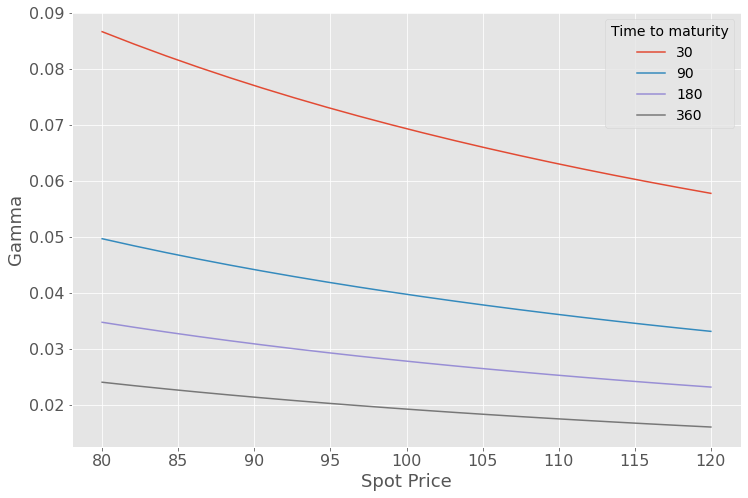

In [95]:
from cProfile import label
import matplotlib.pyplot as plt
plt.style.use('ggplot')

fig, ax = plt.subplots(figsize = (12,8))
for t in df.maturity.unique():
    _ = df.query("maturity == @t")
    ax.plot(_.spot, _.gamma, label = t)

ax.tick_params(axis='both', labelsize=16)
ax.set_xlabel("Spot Price", fontsize=18)
ax.set_ylabel("Gamma", fontsize=18)
plt.legend(title = "Time to maturity", title_fontsize = 14, fontsize=14, loc = 1)

## No consecutive heads

In [35]:
def possiblesequence(n: int, k:int):
    res = list()
    def backtrack(idx, comb):
        if len(comb) == n:
            res.append("".join(comb))
        if len(comb) > n:
            return
        backtrack(idx + 1, comb + ["H"])
        backtrack(idx + 1, comb + ["T"])
        
    backtrack(0, [])
    
    count = 0
    for seq in res:
        if "H"*k not in seq:
            count += 1
    print("Toss a coin {0} times:".format(n))
    print("No Consequtive {0} heads : {1}".format(k, count))
    print("Total Possibilities: {0}".format(2**n))
    # return count

In [36]:
possiblesequence(10,2)

Toss a coin 10 times:
No Consequtive 2 heads : 144
Total Possibilities: 1024
